In [1]:
%%capture
#### Load Libraries (without cell output)

import autograd.numpy as np # import autograd wrapped numpy
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import neighbors, metrics
from sklearn.preprocessing import scale

import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Gamma

In [2]:
claims = pd.read_csv("./Qualification_Package/Claims_Years_1_to_3.csv")
print(claims['claim_amount'].mean())

print(claims.shape)

1187.758451280604
(14173, 24)


In [3]:
claims['pol_pay_freq'] = claims['pol_pay_freq'].replace( {'Biannual': 2, 'Yearly': 1, 'Monthly': 12, 'Quarterly': 4} )
claims['pol_payd'] = claims['pol_payd'].replace( {'No': 0, 'Yes': 1} )
claims['drv_sex1'] = claims['drv_sex1'].replace( {'M': 1, 'F': 0} )
claims['vh_type'] = claims['vh_type'].replace( {'Tourism': 1, 'Commercial': 0} )
claims['drv_drv2'] = claims['drv_drv2'].replace( {'No': 0, 'Yes': 1} )

C:\Users\kyle\AppData\Local\Temp\ipykernel_23068\166129329.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  claims['pol_pay_freq'] = claims['pol_pay_freq'].replace( {'Biannual': 2, 'Yearly': 1, 'Monthly': 12, 'Quarterly': 4} )
C:\Users\kyle\AppData\Local\Temp\ipykernel_23068\166129329.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  claims['pol_payd'] = claims['pol_payd'].replace( {'No': 0, 'Yes': 1} )
C:\Users\kyle\AppData\Local\Temp\ipykernel_23068\166129329.py:3: FutureWarning: Downcasting behavior in `replace` is depreca

In [4]:
print(claims.dtypes)
print(claims.columns.to_list())


id_policy                  object
year                        int64
pol_no_claims_discount    float64
pol_duration                int64
pol_pay_freq                int64
pol_payd                    int64
pol_usage                  object
drv_sex1                    int64
drv_age1                    int64
drv_age_lic1                int64
drv_drv2                    int64
drv_sex2                   object
drv_age2                  float64
drv_age_lic2              float64
vh_make_model              object
vh_age                      int64
vh_fuel                    object
vh_type                     int64
vh_speed                  float64
vh_value                  float64
vh_weight                 float64
population                  int64
town_surface_area         float64
claim_amount              float64
dtype: object
['id_policy', 'year', 'pol_no_claims_discount', 'pol_duration', 'pol_pay_freq', 'pol_payd', 'pol_usage', 'drv_sex1', 'drv_age1', 'drv_age_lic1', 'drv_drv2', 'drv_sex2', '

In [5]:
objects = claims.select_dtypes(['object'])
categorical = claims.select_dtypes(['int64'])
continuous = claims.select_dtypes(['float64'])

In [6]:
from sklearn.impute import SimpleImputer

objects_filled = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(objects)
categorial_filled = SimpleImputer(missing_values=np.nan, strategy='median').fit_transform(categorical)
continuous_filled = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(continuous)

objects_filled = pd.DataFrame(objects_filled, columns=objects.columns.to_list())
categorial_filled = pd.DataFrame(categorial_filled, columns=categorical.columns.to_list())
continuous_filled = pd.DataFrame(continuous_filled, columns=continuous.columns.to_list())

In [7]:
design_matrix = pd.get_dummies(objects_filled, columns=['vh_make_model', 'pol_usage', 'drv_sex2', 'vh_fuel'], dtype=int)
design_matrix

objects_design = design_matrix.drop(columns=['id_policy'])

In [8]:
df = pd.concat([objects_design, categorial_filled, continuous_filled], axis = 1)

In [9]:
print(df.shape)
df.head(10)


(14173, 498)


,vh_make_model_aawqanlavsjfqrne,vh_make_model_abacekzzrkhtgpcp,vh_make_model_abcepdrvvynjsufa,vh_make_model_aceqpjprqgzhffuw,vh_make_model_adhoqfsfdpetomvs,vh_make_model_adzzjitkyqlberpu,vh_make_model_aewtdnpoiopumymt,vh_make_model_aifsqdniwqmcuqpv,vh_make_model_aivacsqryguqpdib,vh_make_model_ajktbllxjzfdtwpy,...,vh_type,population,pol_no_claims_discount,drv_age2,drv_age_lic2,vh_speed,vh_value,vh_weight,town_surface_area,claim_amount
0,0,0,0,0,0,0,0,0,0,0,...,1.0,320.0,0.000,48.031279,26.131633,200.0,25000.0,1300.0,58.3,339.84
1,0,0,0,0,0,0,0,0,0,0,...,1.0,530.0,0.000,48.031279,26.131633,158.0,13390.0,885.0,385.6,1236.00
2,0,0,0,0,0,0,0,0,0,0,...,1.0,960.0,0.000,42.000000,24.000000,160.0,2088.0,0.0,701.5,224.33
3,0,0,0,0,0,0,0,0,0,0,...,1.0,1290.0,0.000,49.000000,27.000000,182.0,11785.0,1080.0,49.8,1343.41
4,0,0,0,0,0,0,0,0,0,0,...,1.0,70.0,0.070,48.031279,26.131633,250.0,25250.0,1450.0,30.8,130.23
5,0,0,0,0,0,0,0,0,0,0,...,1.0,10.0,0.000,34.000000,14.000000,158.0,13390.0,885.0,52.9,390.03
6,0,0,0,0,0,0,0,0,0,0,...,1.0,240.0,0.000,58.000000,39.000000,168.0,11876.0,1225.0,103.7,699.54
7,0,0,0,0,0,0,0,0,0,0,...,1.0,1980.0,0.000,48.031279,26.131633,170.0,11129.0,927.0,218.2,381.15
8,0,0,0,0,0,0,0,0,0,0,...,0.0,1300.0,0.319,48.031279,26.131633,148.0,16702.0,1350.0,53.0,87.53
9,0,0,0,0,0,0,0,0,0,0,...,1.0,390.0,0.000,34.000000,16.000000,200.0,25000.0,1300.0,396.5,670.91


In [10]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y, 
    train_size = 0.8,
    test_size = 0.2, # train is 80%, test is 20% 
    random_state = 0, # stratify = y,
)

In [12]:
#### Calculate RMSE for predictions
def RMSE(x, y):
    MSE = ((y - x) ** 2).mean()
    return np.sqrt(MSE)

# This benchmark RMSE is 2193.342.
# We must iterate from here to get a better model, either with GLM, machine learning, or something else.

In [13]:
from sklearn.tree import DecisionTreeRegressor

from joblib import dump, load

evaluation = {}

for crit in ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']:
    for split in ['best', 'random']:
        tree = DecisionTreeRegressor(criterion=crit, splitter=split, random_state=0)
        tree.fit(x_train, y_train)
        y_pred = tree.predict(x_test)
        err = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 3) # calculate RMSE
        evaluation[crit + '_' + split] = err

        dump(tree, 'models/dtr_' + crit + '_' + split)

evaluation


{'squared_error_best': 2020.852,
 'squared_error_random': 2056.555,
 'friedman_mse_best': 1966.072,
 'friedman_mse_random': 2059.656,
 'absolute_error_best': 1993.626,
 'absolute_error_random': 2098.395,
 'poisson_best': 1939.668,
 'poisson_random': 1942.902}

{'squared_error_best': 1974.72,  
 'squared_error_random': 2516.824,  
 'friedman_mse_best': 1937.637,  
 'friedman_mse_random': 2108.74,  
 'absolute_error_best': 2652.159,  
 'absolute_error_random': 2567.09,  
 'poisson_best': 1960.4,  
 'poisson_random': 2011.287}

Tree finds that the smallest error of the model is using the ``friedman_mse`` with RMSE of ``1937.637``. This is only slightly better than benchmark RMSE of ``2193.342``.

In [14]:
k_range = range(1, 40)
scores_r = [] 

for k in k_range:
    knn_r = neighbors.KNeighborsRegressor(n_neighbors=k)
    knn_r.fit(x_train, y_train)
    y_r_pred = knn_r.predict(x_test)
    scores_r.append(round(np.sqrt(metrics.mean_squared_error(y_test, y_r_pred)), 2))
    dump(knn_r, f'models/knn_{k}')

In [15]:
dict_knn = {i: scores_r[i-1] for i in k_range}
print(dict_knn)
print(min(dict_knn.values()))

{1: 1957.44, 2: 1670.44, 3: 1557.07, 4: 1513.06, 5: 1525.46, 6: 1503.76, 7: 1472.0, 8: 1457.81, 9: 1446.4, 10: 1436.34, 11: 1428.23, 12: 1422.36, 13: 1416.4, 14: 1412.51, 15: 1406.41, 16: 1402.47, 17: 1400.01, 18: 1394.92, 19: 1395.69, 20: 1391.3, 21: 1388.18, 22: 1384.36, 23: 1383.44, 24: 1384.18, 25: 1382.26, 26: 1383.34, 27: 1382.78, 28: 1382.17, 29: 1382.36, 30: 1380.43, 31: 1378.39, 32: 1377.91, 33: 1377.38, 34: 1378.93, 35: 1379.95, 36: 1380.71, 37: 1380.24, 38: 1381.49, 39: 1381.13}
1377.38


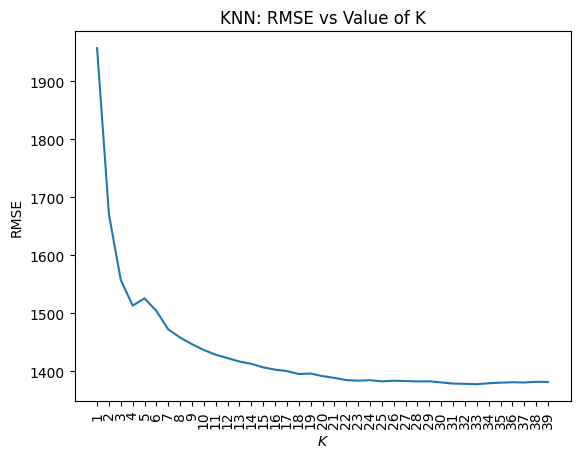

{(8, 1457.81), (2, 1670.44), (9, 1446.4), (18, 1394.92), (3, 1557.07), (25, 1382.26), (7, 1472.0), (27, 1382.78), (37, 1380.24), (14, 1412.51), (24, 1384.18), (5, 1525.46), (1, 1957.44), (16, 1402.47), (21, 1388.18), (38, 1381.49), (39, 1381.13), (22, 1384.36), (19, 1395.69), (28, 1382.17), (33, 1377.38), (23, 1383.44), (12, 1422.36), (20, 1391.3), (4, 1513.06), (11, 1428.23), (32, 1377.91), (34, 1378.93), (31, 1378.39), (10, 1436.34), (30, 1380.43), (26, 1383.34), (36, 1380.71), (17, 1400.01), (15, 1406.41), (6, 1503.76), (13, 1416.4), (29, 1382.36), (35, 1379.95)}


In [16]:
plt.plot(k_range, scores_r)
plt.title('KNN: RMSE vs Value of K')
plt.xlabel(r'$K$')
plt.ylabel('RMSE')
plt.xticks(k_range, rotation=90)
plt.show()

print(set(zip(k_range, scores_r)))

```
{1: 2036.15, 2: 1711.93, 3: 1607.59, 4: 1564.84, 5: 1569.29, 
6: 1553.37, 7: 1530.49, 8: 1530.11, 9: 1518.64, 10: 1510.67, 
11: 1504.14, 12: 1500.12, 13: 1495.41, 14: 1490.34, 15: 1486.09, 
16: 1481.07, 17: 1478.32, 18: 1476.8, 19: 1473.54, 20: 1470.76, 
21: 1469.23, 22: 1466.91, 23: 1466.75, 24: 1466.45, 25: 1468.02, 
26: 1466.29, 27: 1466.02, 28: 1465.43, 29: 1463.68, 
30: 1461.29, 
31: 1461.75, 32: 1461.61, 33: 1461.63, 34: 1461.4, 
35: 1464.1, 36: 1464.59, 37: 1463.44, 38: 1462.96, 39: 1463.33}
```

Minimum Error: $K=30$, $RMSE=1461.29$

In [17]:
from sklearn import svm

support = svm.SVR()
support.fit(x_train, y_train)
y_pred_svm = support.predict(x_test)

print(RMSE(y_pred_svm, y_test))

1420.5703867137217


In [18]:
dump(support, 'models/svm')

['models/svm']

SVM: Minimum Error $RMSE=1420.570$.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor

r1 = DecisionTreeRegressor(criterion='squared_error', splitter='best', random_state=0)
r2 = KNeighborsRegressor(n_neighbors=30)
r3 = svm.SVR()

er = VotingRegressor([('dt', r1), ('kn', r2), ('sv', r3)])

er.fit(x_train, y_train)

y_pred = er.predict(x_test)

print(RMSE(y_pred, y_test))

1457.421859844611


Best result using Voting Regressor (combine DTR, KNN, SVM), is ``1457.421``.

Plotting all from voting regressor (see below)

In [20]:
xt = x[:20]

r1.fit(x, y)
r2.fit(x, y)
r3.fit(x, y)

pred1 = r1.predict(xt)
pred2 = r2.predict(xt)
pred3 = r3.predict(xt)
pred4 = er.predict(xt)

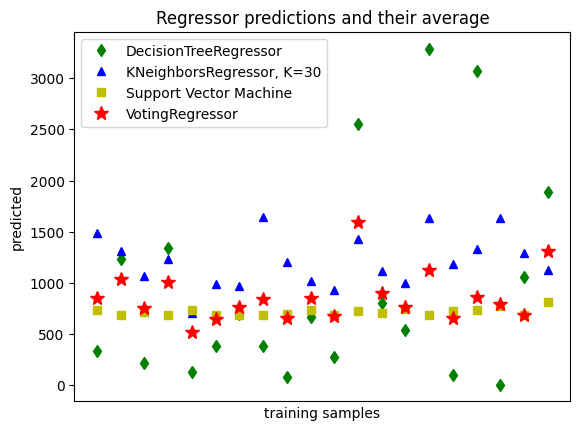

In [21]:
plt.figure()
plt.plot(pred1, "gd", label="DecisionTreeRegressor")
plt.plot(pred2, "b^", label="KNeighborsRegressor, K=30")
plt.plot(pred3, "ys", label="Support Vector Machine")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()

In [22]:
from joblib import dump, load


dump(er, 'models/voting_regressor')

['models/voting_regressor']